# Intro to TensorFlow

## Backpropagation on zero hidden layer classification case

\begin{align}
z_i =& Wx_i\\
a_i =& \sigma(z_i)
\end{align}
where $\sigma(z_i) = 1/(1+exp(-z_i))$ is the sigmoid function and the loss function is $$\mathcal{L} = \frac{1}{2N}\sum_i (y_i-a_i)^2$$.

We need to adjust the $W$ to minimise the loss function. We use the chain rule:
\begin{align}
\frac{d \mathcal{L}}{dW} =& \sum_i \frac{d\mathcal{L}}{da_i}\frac{da_i}{dz_i}\frac{dz_i}{dW}\\
=& \frac{1}{N}\sum_i -(y_i-a_i)\cdot\frac{\exp(-z)}{(1+\exp(-z))^2}\cdot x_i\\
=& \frac{1}{N}\sum_i -(y_i-a_i)\cdot a_i(1-a_i)\cdot x_i
\end{align}

In [3]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)

%matplotlib inline

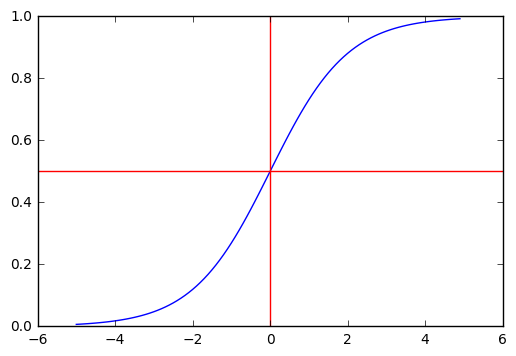

In [4]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

z = np.arange(-5,5,0.1)

plt.plot(z,sigmoid(z))
plt.plot([0,0],[0,1],'r')
plt.plot([-6,6],[0.5,0.5],'r')

In [31]:
N = 1000
D = 5

X = 5*np.random.randn(N,D)
w = np.random.randn(D,1)
y = X.dot(w)

y[y<=0] = 0 
y[y>0] = 1

In [32]:
train_X = X[1:100]
test_X = X[100:]

In [33]:
X.shape

(1000, 5)

In [34]:
train_X.shape

(99, 5)

In [35]:
test_X.shape

(900, 5)

In [13]:
def dL_dw(X,e,a):
    return -X.T.dot(e*a*(1-a))/len(X)

def gradient_descent(gamma=5e-1, n_epochs=1000, batch_size=100, decay=0.9):
    epoch_run = int(len(X)/batch_size)
    
    # get starting conditions
    w = np.random.randn(D,1)
    params = []
    loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        params.append(w)
        
        for j in range(epoch_run):
            idx = np.random.choice(len(X),batch_size,replace=False)
            a = sigmoid(X[idx].dot(w)) # Activation function
            e = y[idx] - a # Really important that you use y_obs and not y (you do not have access to true y)
            #update parameters
            w = w - gamma*dL_dw(X[idx],e,a)
        loss[i] = 0.5*e.T.dot(e)/len(e)    
        gamma = gamma*decay #decay the learning parameter
        
    return params, loss
        
params, loss = gradient_descent()

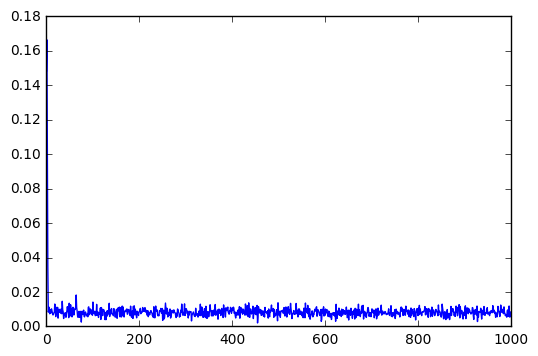

In [14]:
plt.plot(loss)

In [15]:
np.hstack([params[-1],w])

array([[-0.31226165, -0.42375968],
       [-0.34929182, -0.45341411],
       [-1.3870532 , -1.79564317],
       [-0.24588416, -0.33009019],
       [ 0.53334152,  0.73282908]])

In [34]:
idx = np.random.choice(len(X),20,replace=False)
a = sigmoid(X[idx].dot(w)) # Activation function
e = y[idx] - a
0.5*e.T.dot(e)/len(e)

array([[ 0.00271073]])

In [39]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(params[-1])) # Get a probability measure given X
# y_inferred[y_inferred>0.5] = 1
# y_inferred[y_inferred<=0.5] = 0

# np.sum(y_test==y_inferred)

In [40]:
y_inferred

array([[ 0.59212459],
       [ 0.04565469],
       [ 0.77990792],
       [ 0.90342007],
       [ 0.59996835],
       [ 0.29773809],
       [ 0.13630193],
       [ 0.34443033],
       [ 0.05281507],
       [ 0.95916731],
       [ 0.39886641],
       [ 0.32377809],
       [ 0.93266641],
       [ 0.89047342],
       [ 0.91654284],
       [ 0.3096137 ],
       [ 0.89085671],
       [ 0.08468025],
       [ 0.0682014 ],
       [ 0.86759839],
       [ 0.11451954],
       [ 0.84899476],
       [ 0.91949903],
       [ 0.96345777],
       [ 0.66395764],
       [ 0.60298754],
       [ 0.17938914],
       [ 0.07297451],
       [ 0.96555026],
       [ 0.3214108 ],
       [ 0.01360696],
       [ 0.18504142],
       [ 0.18243418],
       [ 0.50941075],
       [ 0.83446736],
       [ 0.12447293],
       [ 0.03391092],
       [ 0.09914296],
       [ 0.0237882 ],
       [ 0.08282643],
       [ 0.56254324],
       [ 0.90517307],
       [ 0.82221402],
       [ 0.78277316],
       [ 0.95257104],
       [ 0

In [37]:
X

array([[ -2.85286869,   0.38445623,   1.29466628,   0.25161289,
        -18.07827245],
       [  1.37980297,   1.32383422,   4.63029167,   5.064496  ,
         -2.86909893],
       [  5.96511883,   0.53036984,   4.33195806,  -4.30383315,
          0.22467792],
       ..., 
       [  3.29258305,   4.4280978 ,  -6.77590678,  -1.59455444,   2.2591151 ],
       [ -0.30312112,  -9.37317605,  -8.24607692,  -2.6360097 ,
          2.43306665],
       [  1.76339986,  -4.92432826,   1.49844377, -13.59580242,
          1.58480866]])

In [38]:
y_test

array([[ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 0.],
       [ 0.],
       [ 1.],
       [ 0.],
      

## Cross Entropy Error

We shall focus on doing the same as above with a different loss function, the Cross Entropy Loss function.
$$\mathcal{L} = -\frac{1}{N}\sum_i y_i\log(a_i)+(1-y_i)\log(1-a_i)$$.

The following remains the same:
\begin{align}
z_i =& Wx_i\\
a_i =& \sigma(z_i)
\end{align}
and the derivative,
\begin{align}
\frac{d \mathcal{L}}{dW} =& \sum_i \frac{d\mathcal{L}}{da_i}\frac{da_i}{dz_i}\frac{dz_i}{dW}\\
=& \frac{1}{N}\sum_i -\left(\frac{y_i}{a_i}-\frac{1-y_i}{1-a_i}\right)\cdot\frac{\exp(-z)}{(1+\exp(-z))^2}\cdot x_i\\
=& \frac{1}{N}\sum_i -\left(\frac{y_i-a_i}{a_i(1-a_i)}\right)\cdot a_i(1-a_i)\cdot x_i\\
=& \frac{1}{N}\sum_i -(y_i-a_i)\cdot x_i
\end{align}

In [20]:
from IPython.core.debugger import Tracer;

def dL_dw(X,e,a):
    return -X.T.dot(e)/len(X)

def gradient_descent(gamma=1e-2, n_epochs=1000, batch_size=100, decay=0.9):
    epoch_run = int(len(X)/batch_size)
    
    # get starting conditions
    # NOTE: I initialised w such that its variance is 1/D
    w = np.random.randn(D,1)*(1/np.sqrt(D))
    params = []
    loss = np.zeros((n_epochs,1))
    for i in range(n_epochs):
        params.append(w)
        
        for j in range(epoch_run):
            idx = np.random.choice(len(X),batch_size,replace=False)
            a = sigmoid(X[idx].dot(w)) # Activation function
            e = y[idx] - a # Really important that you use y_obs and not y (you do not have access to true y)  
            w = w - gamma*dL_dw(X[idx],e,a)
#         
        loss[i] = -np.mean(y[idx]*np.log(a+1e-10)+(1-y[idx])*np.log(1-a+1e-10))
        gamma = gamma*decay #decay the learning parameter
        
    return params, loss
        
params, loss = gradient_descent()

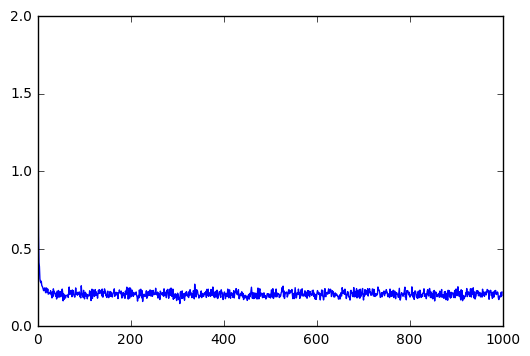

In [21]:
plt.plot(loss)

In [22]:
np.hstack([params[-1],w])

array([[-0.10620062, -0.42375968],
       [-0.13098129, -0.45341411],
       [-0.48472119, -1.79564317],
       [-0.08472323, -0.33009019],
       [ 0.16453652,  0.73282908]])

In [23]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(params[-1])) # Get a probability measure given X
y_inferred[y_inferred>0.5] = 1
y_inferred[y_inferred<=0.5] = 0

np.sum(y_test==y_inferred)

99

## Tensorflow Introduction

In [24]:
import tensorflow as tf

In [25]:
def tf_train(X_train, y_train, batch_size=20):
    # Dataset (inputs and labels)
    x = tf.placeholder(tf.float32, [None, D])
    y_ = tf.placeholder(tf.float32, [None, 1])
    
    # random variable
    W = tf.Variable(tf.random_normal([D, 1],stddev=1/np.sqrt(D)))
    W2 = tf.Variable(tf.random_normal([D, 1],stddev=1/np.sqrt(D)))
    # map X to inferred output function
    a = tf.sigmoid(tf.matmul(x, W))
    a2 = tf.sigmoid(tf.matmul(a, W2))

    # Define loss and optimizer
    cross_entropy = tf.reduce_mean(-(y_*tf.log(a)+(1-y_)*tf.log(1-a)))
    train_step = tf.train.GradientDescentOptimizer(1e-2).minimize(cross_entropy)

    sess = tf.InteractiveSession()
    tf.initialize_all_variables().run()
    # Train
    for epoch in range(1000):
        idx = np.random.choice(len(X_train),batch_size,replace=False)
        _,l = sess.run([train_step, cross_entropy], feed_dict={x: X_train[idx], y_: y_train[idx]})
        if epoch%100 == 0:
            print('loss: '+str(l))
        

In [26]:
tf_train(X,y)

loss: 1.0809
loss: 0.112336
loss: 0.0991287
loss: 0.142813
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan
loss: nan


In [27]:
def tf_train(X_train, y_train, batch_size=20, n_epoch=1000):
    x = tf.placeholder(tf.float32, [None, D])
    W = tf.Variable(tf.random_normal([D, 1],stddev=1/np.sqrt(D)))

    # Define loss and optimizer
    y_ = tf.placeholder(tf.float32, [None, 1])

    cross_entropy = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(tf.matmul(x,W),y_))
    train_step = tf.train.GradientDescentOptimizer(1e-2).minimize(cross_entropy)

    sess = tf.InteractiveSession()
    tf.initialize_all_variables().run()
    # Train
    for epoch in range(n_epoch):
        idx = np.random.choice(len(X_train),batch_size,replace=False)
        _,l = sess.run([train_step, cross_entropy], feed_dict={x: X_train[idx], y_: y_train[idx]})
        if epoch%100 == 0:
            print('loss: '+str(l))
            
    return sess.run(W)

In [28]:
w_est = tf_train(X,y)

loss: 2.87069
loss: 0.245732
loss: 0.12336
loss: 0.0978604
loss: 0.123775
loss: 0.138903
loss: 0.113195
loss: 0.055512
loss: 0.047361
loss: 0.112516


In [29]:
np.hstack([w_est,w])

array([[-0.29448661, -0.42375968],
       [-0.33894494, -0.45341411],
       [-1.38289893, -1.79564317],
       [-0.23116806, -0.33009019],
       [ 0.52498722,  0.73282908]])

In [30]:
# Classification error
X_test = 5*np.random.randn(100,D)
y_test = X_test.dot(w)
y_test[y_test<=0] = 0 
y_test[y_test>0] = 1

y_inferred = sigmoid(X_test.dot(w_est)) # Get a probability measure given X
y_inferred[y_inferred>0.5] = 1
y_inferred[y_inferred<=0.5] = 0

np.sum(y_test==y_inferred)

98